In [1]:
import QCflow
from QCflow.fragments import *
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Adding attachment points to molecules

In [2]:
example_dic = {'mol_1' : 'C1=CSC=C1', 'mol_2' : 'C12=CSC=C1OCCO2', 'mol_3' : 'C12=NSN=C1C=CC=C2'} #three example molecules

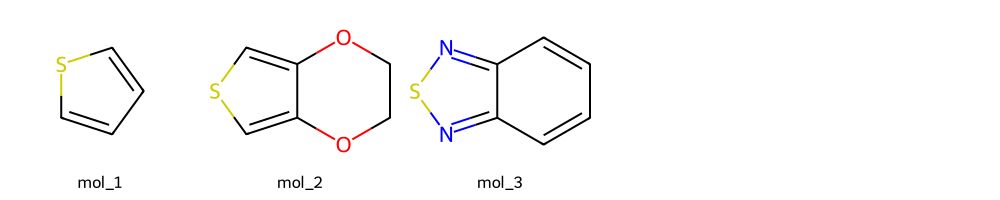

In [3]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in example_dic.values()], 
                     maxMols=162,molsPerRow=5, legends=list(example_dic.keys()))

In [4]:
example_dic_attach = generate_attachment_points(example_dic, find='[cH;^2]', get_rid='C([I])') #generate attachment points for the molecules, denoted by Iondine atom

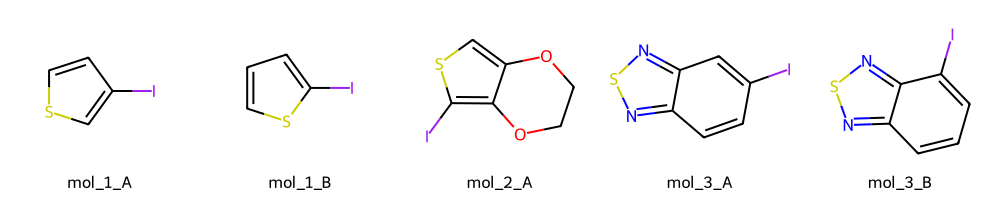

In [5]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in example_dic_attach.values()], 
                     maxMols=162,molsPerRow=5, legends=list(example_dic_attach.keys()))

## By using SMARTS patterns you can filter out systems with unwanted attachment points. This is called masking.

In [6]:
sub_1 = Chem.MolFromSmarts('[#53][#6]1:[#6]:[#6]:[#16]:[#6]1') #don't want this
sub_2 = Chem.MolFromSmarts('[#53][#6]1:[#6]:[#6]:[#6]:2[#6](:[#6]1):[#7]:[#16]:[#7]:2') #don't want this

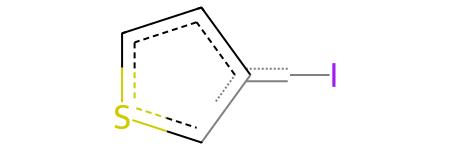

In [7]:
sub_1

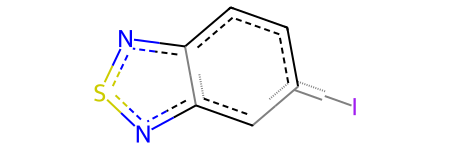

In [8]:
sub_2

In [9]:
removed_masks = {}
continued_mask = {}
for k, v in example_dic_attach.items():
    mol = Chem.MolFromSmiles(v)
    if mol.HasSubstructMatch(sub_1) == True or mol.HasSubstructMatch(sub_2) == True:
        continued_mask[k] = v
    else:
        removed_masks[k] = v

### Wanted attachment points

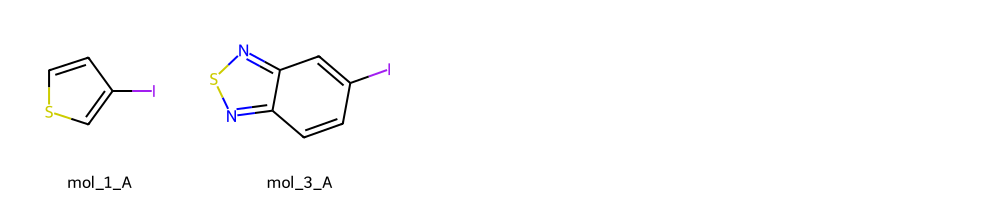

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in continued_mask.values()], 
                     maxMols=162,molsPerRow=5, legends=list(continued_mask.keys()))

### Discared systems

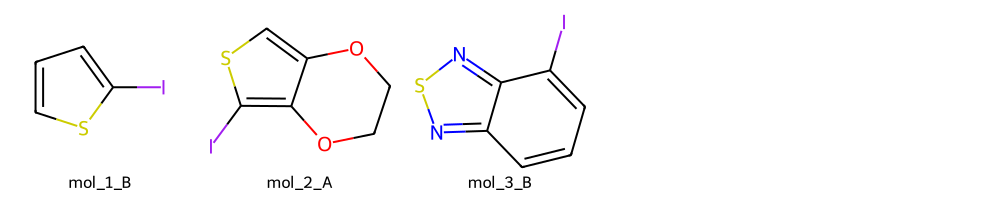

In [11]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in removed_masks.values()], 
                     maxMols=162,molsPerRow=5, legends=list(removed_masks.keys()))

## Adding functional groups to molecules

In [12]:
example_functional = {'methoxy' : 'IOC', 'methyl' : 'IC'}

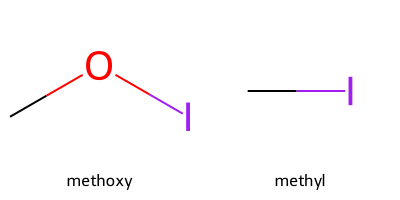

In [13]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in example_functional.values()], 
                     maxMols=162,molsPerRow=2, legends=list(example_functional.keys()))

In [14]:
functionalised_monomers = make_molecule_dic_from_2_dic(continued_mask, example_functional)

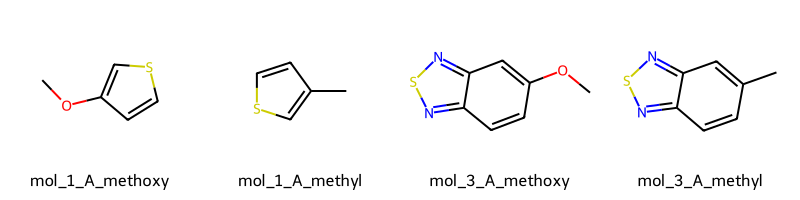

In [15]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in functionalised_monomers.values()], 
                     maxMols=162,molsPerRow=4, legends=list(functionalised_monomers.keys()))

## Then I re-do the auto attachment but this time keep systes with attachment points in logical linking position

In [16]:
func_mono_att = generate_attachment_points(functionalised_monomers, find='[cH;^2]', get_rid='C([I])') #generate attachment points for the molecules, denoted by Iondine atom

In [17]:
removed_masks_func = {}
continued_mask_func = {}
for k, v in func_mono_att.items():
    mol = Chem.MolFromSmiles(v)
    if mol.HasSubstructMatch(sub_1) == True or mol.HasSubstructMatch(sub_2) == True:
        removed_masks_func[k] = v
    else:
        continued_mask_func[k] = v

## Retained systems

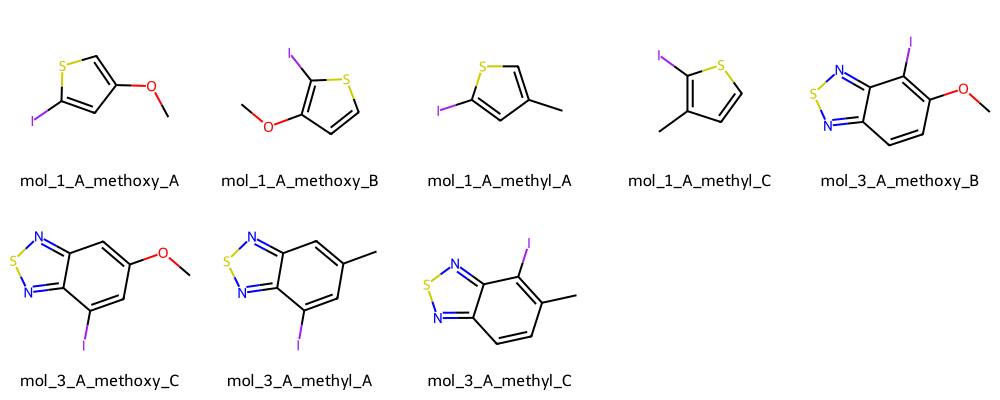

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in continued_mask_func.values()], 
                     maxMols=162,molsPerRow=5, legends=list(continued_mask_func.keys()))

## Discarded systems

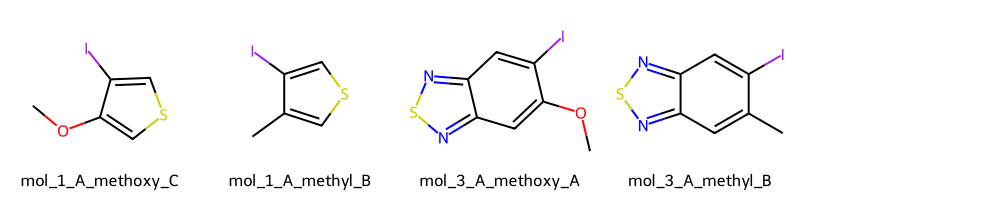

In [19]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in removed_masks_func.values()], 
                     maxMols=162,molsPerRow=5, legends=list(removed_masks_func.keys()))

## Combining systems

In [21]:
example_combine = combine_structure(continued_mask_func['mol_1_A_methoxy_A'], continued_mask_func['mol_1_A_methoxy_A']) # With the denoted iodine, two systems can be combined

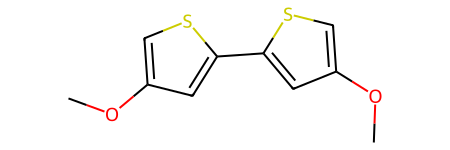

In [22]:
Chem.MolFromSmiles(example_combine)

### On a larger scale I combine two dictionaries. The example in this paper is melanin with molecules found in literature.

### In the case of DHI I manaully assign the attachment points as the linkers are also pre-attached to the molecule.

In [23]:
dhi_mel = {'dhi_2_single' : 'COC1=CC2=C(C=C(I)N2[H])C=C1OC', 'dhi_4_thio' : 'COC1=CC2=C(C=CN2[H])C(C3=CC=C(I)S3)=C1OC', 'dhi_7_triple' : 'COC1=C(C#CI)C2=C(C=CN2[H])C=C1OC'}

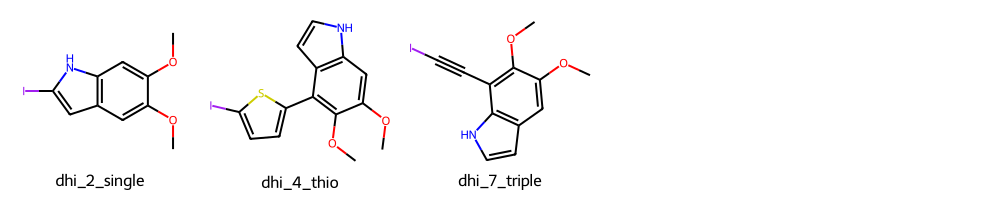

In [24]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in dhi_mel.values()], 
                     maxMols=162,molsPerRow=5, legends=list(dhi_mel.keys()))

In [25]:
dyad_dic = make_molecule_dic_from_2_dic(dhi_mel, continued_mask_func)

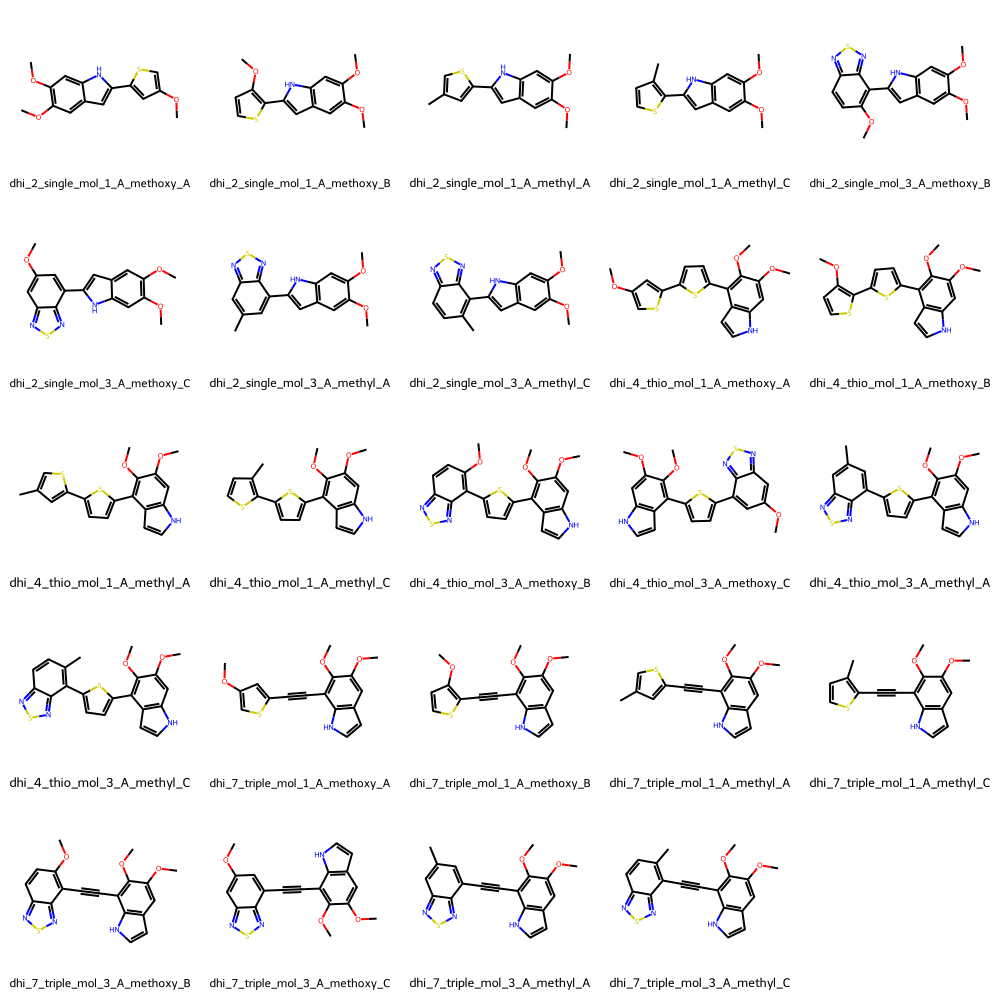

In [26]:
Draw.MolsToGridImage([Chem.MolFromSmiles(v) for v in dyad_dic.values()], 
                     maxMols=162,molsPerRow=5, legends=list(dyad_dic.keys()))

# End